##  Author: Olufemi Victor Tolulope

###### Classification Task on Iris Dataset

######  Task 6: Decision Trees.
This notebook deals with using decision trees for a classification task, the dataset used is the popular iris data set. In this notebook, we will build a decision tree classifier to predict the classes of the Iris dataset.

Getting Started: import necessary packges.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

load in the data and view the head to see data structure.

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#data.Species = data.Species.map({"Iris-setosa":0, "Iris-virginica":1,"Iris-versicolor":2})

Next, we drop the ID column since we dont need it.

In [4]:
data = data.drop("Id", axis =1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Let's do some EDA.

###### A count plot to check the distribution of each variable and ensure balance in the dataset.

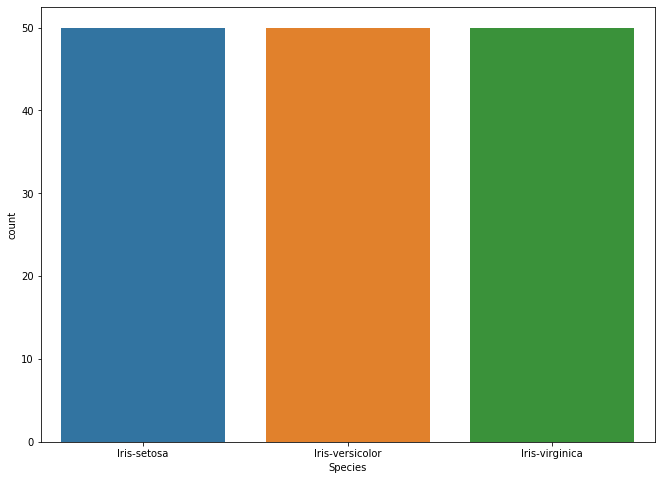

In [5]:
figure, axis = plt.subplots(figsize = (11,8))
sns.countplot(x = "Species", data =data)

###### A pair plot to show pairwise relationships in a dataset.

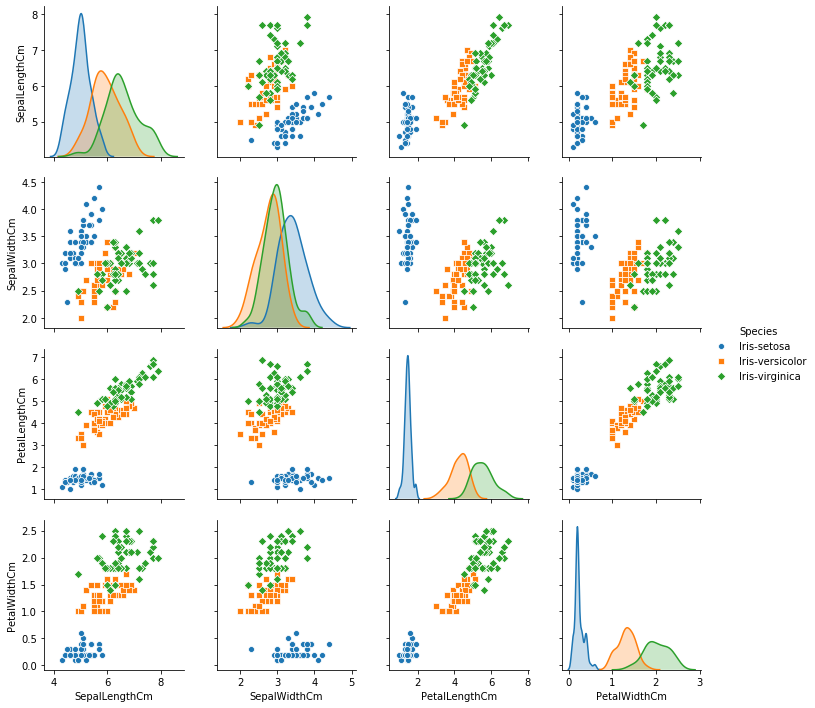

In [6]:
sns.pairplot(data=data,hue="Species", markers=["o", "s", "D"])

###### The Heatmap shows the correlation between the features

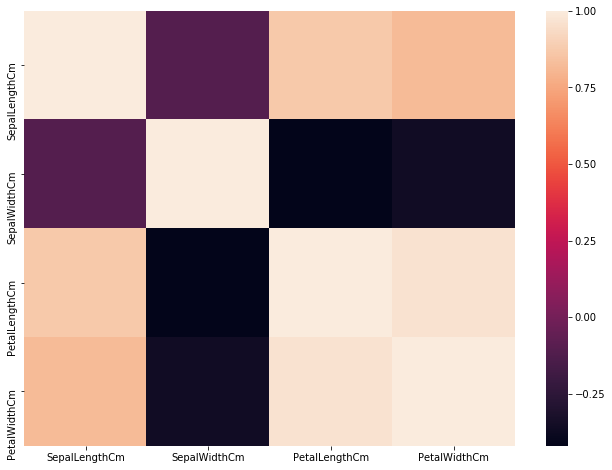

In [7]:
figure, axis = plt.subplots(figsize = (11,8))
sns.heatmap(data=data.corr())

#### Training and Prediction
First we map out the strings to a number to get it set for prediction.

In [8]:
data.Species = data.Species.map({"Iris-setosa":0, "Iris-virginica":1,"Iris-versicolor":2})

In [9]:
species = data.Species
data = data.drop("Species", axis=1)

In [10]:
# create the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

#### Split dataset into train and test set
The split is done such that the train size is 80% while the test size is 20%

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, species, test_size = 0.2, random_state = 2020)

In [12]:
classifier.fit(xtrain,ytrain) #fit the Classifier with the train set.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
predictions = classifier.predict(xtest)

In [14]:
predictions # View predictions

array([1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 0], dtype=int64)

#### Model Evaluation
For classification tasks, evaluation is quite simple since labels are discrete. In this case, I used Classification Report, as well as the confusion matrix to see my model performance.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predictions,ytest))
print(classification_report(predictions,ytest))

[[10  0  0]
 [ 0  8  2]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.80      0.80        10
           2       0.80      0.80      0.80        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



Done.

## Visualize the descision tree.

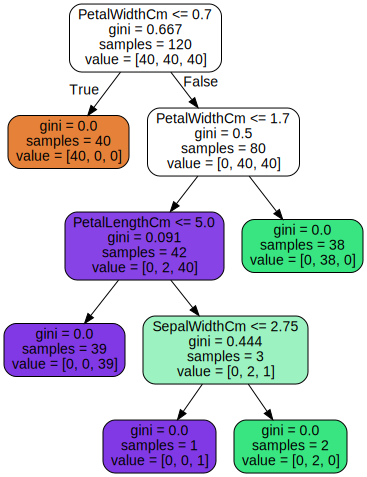

In [18]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                      feature_names=data.columns,  
                      filled=True, rounded=True,  
                      special_characters=False)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
The End.